# Module 2: Stochastic Processes - Brownian Motion and Martingales

This notebook covers Brownian motion, a key concept in stochastic calculus, and martingales.

## 1. Brownian Motion

A **Brownian motion** (or Wiener process) is a continuous-time stochastic process W_t with the following properties:
1. W_0 = 0.
2. The process has independent increments: for t > s, W_t - W_s is independent of the process up to time s.
3. The increments are normally distributed: W_t - W_s ~ N(0, t-s).
4. The sample paths are continuous.

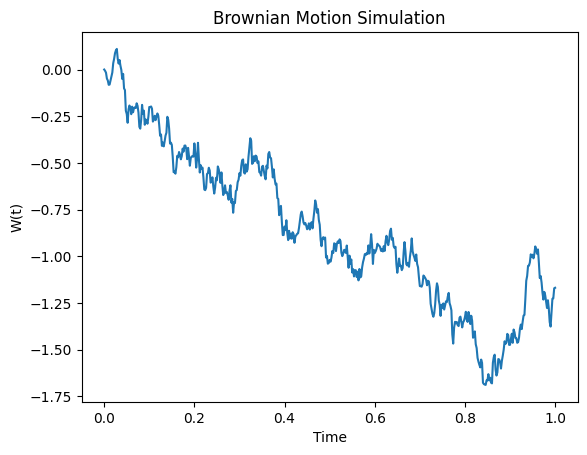

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(T, N):
    """Simulates a Brownian motion.

    Args:
        T: Total time.
        N: Number of steps.

    Returns:
        A tuple (t, W) where t is the time vector and W is the Brownian motion path.
    """
    dt = T / N
    t = np.linspace(0, T, N+1)
    dW = np.random.normal(0, np.sqrt(dt), N)
    W = np.cumsum(np.insert(dW, 0, 0))
    return t, W

T = 1
N = 500
t, W = simulate_brownian_motion(T, N)

plt.plot(t, W)
plt.title('Brownian Motion Simulation')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.show()

## 2. Geometric Brownian Motion

**Geometric Brownian Motion (GBM)** is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion. It is often used to model stock prices.
The SDE for GBM is: dS_t = μS_t dt + σS_t dW_t

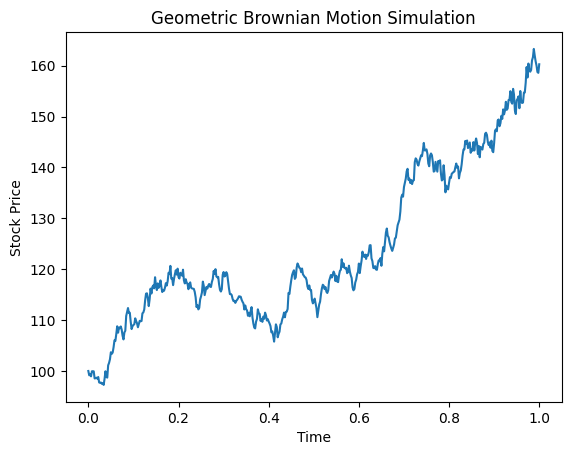

In [2]:
def simulate_gbm(S0, mu, sigma, T, N):
    """Simulates a Geometric Brownian Motion.

    Args:
        S0: Initial stock price.
        mu: Drift.
        sigma: Volatility.
        T: Total time.
        N: Number of steps.

    Returns:
        A tuple (t, S) where t is the time vector and S is the GBM path.
    """
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.normal(0, np.sqrt(dt), N)
    W = np.cumsum(np.insert(W, 0, 0))
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S

S0 = 100
mu = 0.05
sigma = 0.2
T = 1
N = 500

t, S = simulate_gbm(S0, mu, sigma, T, N)

plt.plot(t, S)
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

## 3. Martingales

A **martingale** is a stochastic process {X_t} such that the conditional expectation of the next value, given all past values, is equal to the present value.
E[X_t | F_s] = X_s for s < t
where F_s is the filtration representing the information available up to time s.

A standard Brownian motion is a martingale.

## 📝 Guided Exercises with Auto-Validation

Master Brownian motion properties!

### Exercise 1: Brownian Motion Scaling (Intermediate)

Verify the scaling property of Brownian motion.

In [3]:
# Exercise 1: Brownian Motion Scaling Property
import numpy as np

# Given: For Brownian motion W(t), we have W(t) ~ N(0, t)
# Scaling property: W(ct) has same distribution as sqrt(c) * W(t)

t = 4.0  # Time
c = 4.0  # Scaling factor

# TODO: Calculate variance of W(t)
var_W_t = t

# TODO: Calculate variance of W(ct)
var_W_ct = c * t
# TODO: If we scale W(t) by sqrt(c), what's the variance?
# Var[sqrt(c) * W(t)] = c * Var[W(t)]
var_scaled = c * var_W_t

# TODO: Verify scaling property: Var[W(ct)] == Var[sqrt(c) * W(t)]
scaling_property_holds = np.isclose(var_W_ct, var_scaled)

# ============= AUTO-VALIDATION (DO NOT MODIFY) =============
assert var_W_t is not None, "❌ Calculate Var[W(t)]!"
assert var_W_ct is not None, "❌ Calculate Var[W(ct)]!"
assert var_scaled is not None, "❌ Calculate Var[sqrt(c)*W(t)]!"
assert scaling_property_holds is not None, "❌ Check scaling property!"
assert var_W_t == t, f"❌ Var[W(t)] = t for Brownian motion"
assert var_W_ct == c * t, f"❌ Var[W(ct)] = ct"
assert var_scaled == c * t, f"❌ Var[sqrt(c)*W(t)] = c*t"
assert scaling_property_holds == np.isclose(var_W_ct, var_scaled), "❌ Property check"
assert scaling_property_holds, "❌ Scaling property must hold!"
print("✅ Exercise 1 Complete!")
print(f"   Var[W({t})] = {var_W_t}")
print(f"   Var[W({c*t})] = {var_W_ct}")
print(f"   Var[sqrt({c}) * W({t})] = {var_scaled}")
print(f"   Scaling property holds: {scaling_property_holds}")
print(f"   Interpretation: W(ct) and sqrt(c)*W(t) have identical distributions!")
# =========================================================

✅ Exercise 1 Complete!
   Var[W(4.0)] = 4.0
   Var[W(16.0)] = 16.0
   Var[sqrt(4.0) * W(4.0)] = 16.0
   Scaling property holds: True
   Interpretation: W(ct) and sqrt(c)*W(t) have identical distributions!
